#Task5 - Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

<h4>Dataset Link:<font color=blue> https://www.kaggle.com/datasets/oktayrdeki/traffic-accidents </font>

# Dataset Information

## Context
Traffic accidents are a major concern for urban planning, road safety measures, and emergency response systems. Analyzing accident data can help identify patterns related to road conditions, weather, and time of day, providing insights into accident hotspots and contributing factors. This dataset enables data-driven decision-making to improve road safety.

## Content
### Columns
The dataset consists of the following attributes:
1. **crash_date:** Timestamp of the accident occurrence.
2. **traffic_control_device:** Type of traffic control present at the accident scene (e.g., traffic signal, stop sign).
3. **weather_condition:** Weather conditions during the accident (e.g., clear, rain, snow).
4. **lighting_condition:** Level of lighting at the time of the accident (e.g., daylight, darkness with streetlights).
5. **first_crash_type:** The first event in the crash sequence (e.g., rear-end, angle, turning).
6. **trafficway_type:** Type of roadway where the accident occurred (e.g., four-way, intersection, divided highway).
7. **alignment:** Road alignment at the crash site (e.g., straight and level, curve).
8. **roadway_surface_cond:** Condition of the road surface during the accident (e.g., dry, wet, icy).
9. **road_defect:** Any defects on the road (e.g., no defects, potholes).
10. **crash_type:** Overall classification of the accident (e.g., injury-related, property damage only).
11. **intersection_related_i:** Indicates whether the accident occurred at an intersection.
12. **damage:** Extent of vehicle damage in the accident.
13. **prim_contributory_cause:** Primary cause of the accident (e.g., distracted driving, speeding, weather conditions).
14. **num_units:** Number of vehicles involved in the accident.
15. **most_severe_injury:** The most severe injury reported in the accident.
16. **injuries_total:** Total number of injuries resulting from the crash.
17. **injuries_fatal:** Total number of fatal injuries.
18. **injuries_incapacitating:** Number of serious, incapacitating injuries.
19. **injuries_non_incapacitating:** Number of non-incapacitating injuries.
20. **injuries_reported_not_evident:** Number of reported injuries without visible evidence.
21. **injuries_no_indication:** Number of individuals with no reported injuries.
22. **crash_hour:** Hour of the day when the accident occurred.
23. **crash_day_of_week:** Day of the week the accident occurred.
24. **crash_month:** Month of the year the accident occurred.

### Project Scope
The project involves:
- **Data Cleaning:** Handling missing values, correcting inconsistencies, and removing outliers.
- **Exploratory Data Analysis (EDA):** Understanding accident trends by time, weather, and road conditions.
- **Data Visualization:** Creating charts and heatmaps to uncover accident patterns and hotspots.
- **Risk Assessment:** Identifying high-risk locations and contributing factors for road safety improvements.

##**Import necessary libraries**

In [ ]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization
import missingno as msno  # For visualizing missing data
import warnings  # For handling warnings
warnings.filterwarnings('ignore')  # Ignore warning messages

## **Load the dataset**

In [ ]:
# Load the dataset
file_path = "traffic_accidents.csv"  # Change this to the correct file path
df = pd.read_csv(file_path)

#Display first 5 observation
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [ ]:
# Convert crash_date to datetime if applicable
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')

##**Data Cleaning**

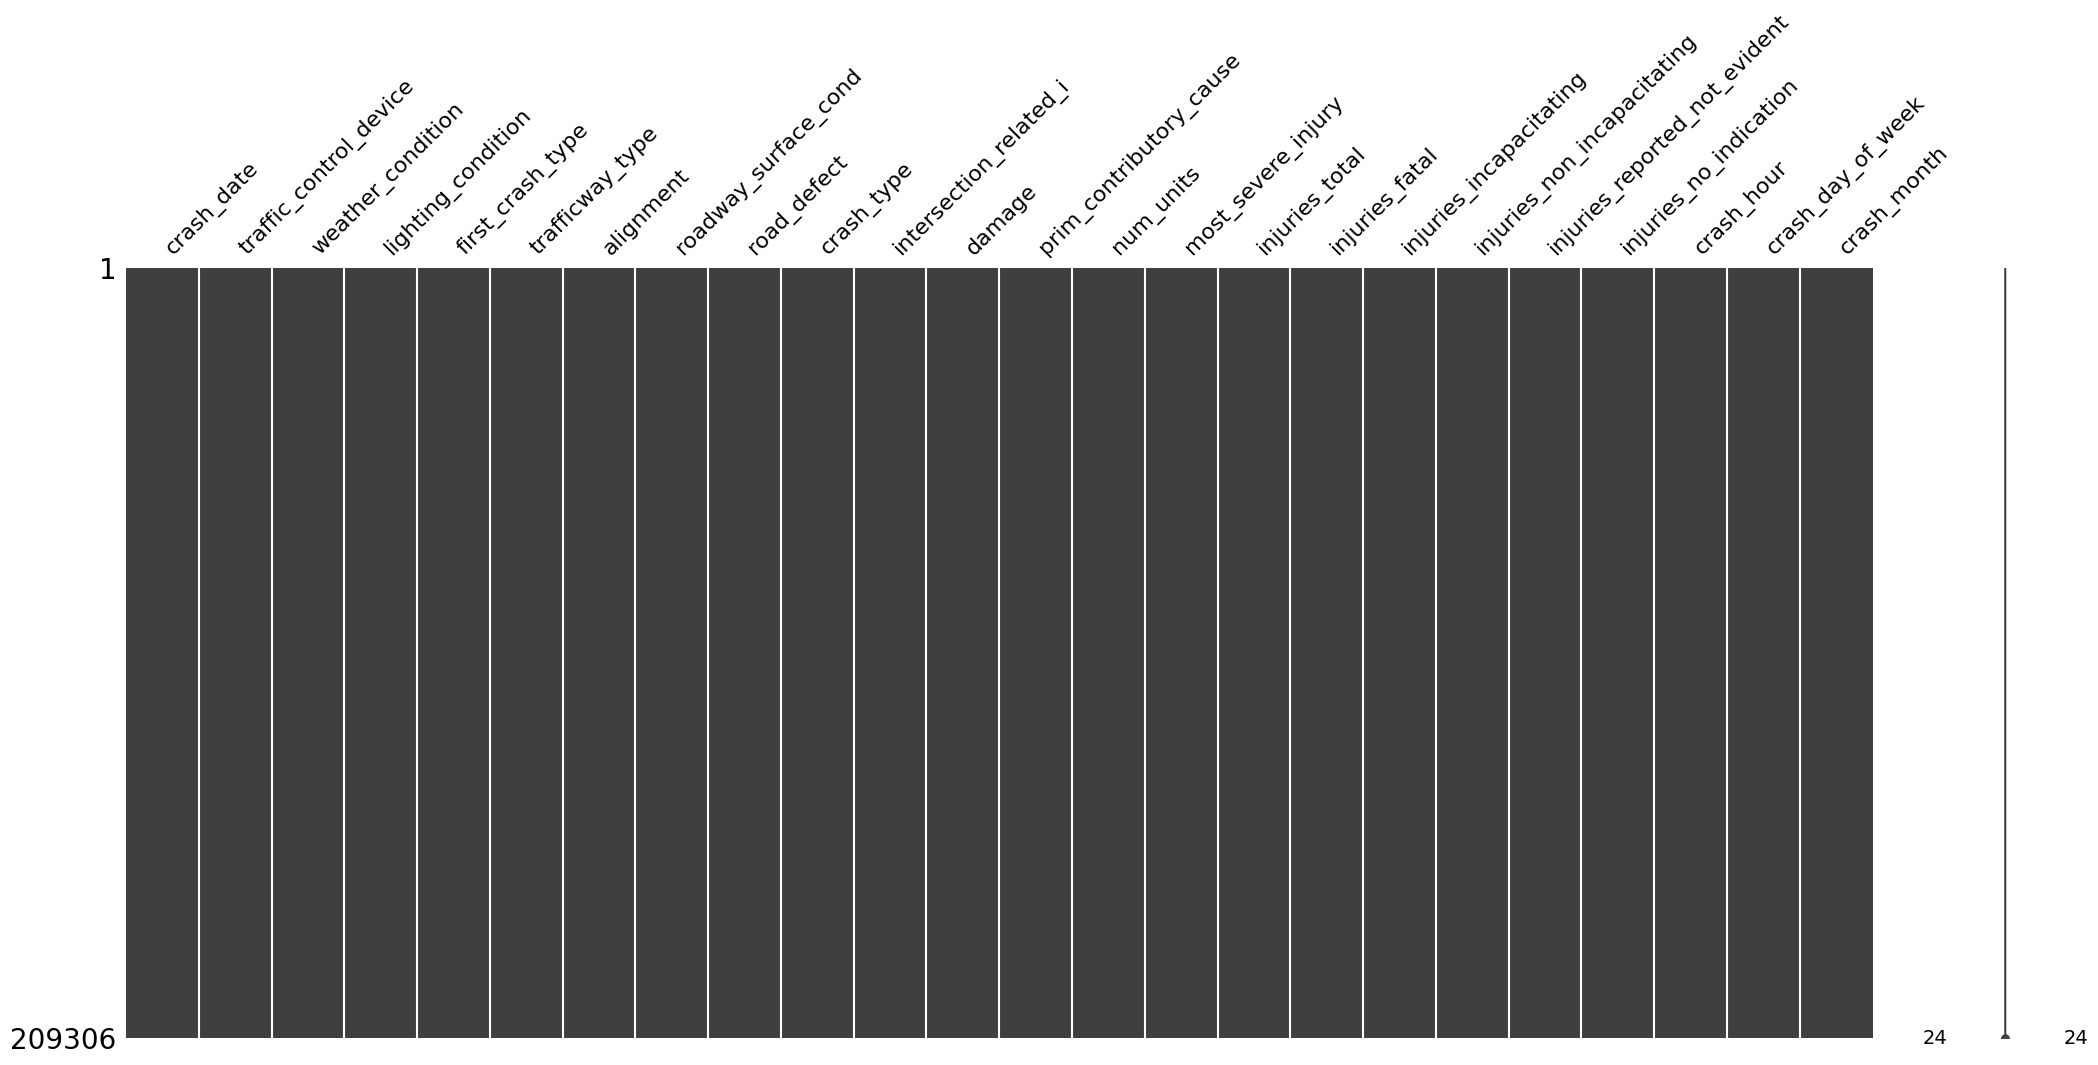

In [ ]:
msno.matrix(df)
df.dropna(inplace=True)

In [ ]:
## Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
## Convert categorical columns to category dtype
categorical_cols = ['weather_condition', 'roadway_surface_cond', 'prim_contributory_cause']
df[categorical_cols] = df[categorical_cols].astype('category')

## **Exploratory Data Analysis (EDA)**

In [ ]:
#Dataset Summary
print(df.describe(include='all'))

                           crash_date traffic_control_device  \
count                          209275                 209275   
unique                            NaN                     19   
top                               NaN         TRAFFIC SIGNAL   
freq                              NaN                 123923   
mean    2020-12-08 23:18:07.071556096                    NaN   
min               2013-03-03 16:48:00                    NaN   
25%               2018-12-03 10:12:30                    NaN   
50%               2020-12-19 17:15:00                    NaN   
75%               2023-01-08 01:30:00                    NaN   
max               2025-01-18 00:17:00                    NaN   
std                               NaN                    NaN   

       weather_condition lighting_condition first_crash_type trafficway_type  \
count             209275             209275           209275          209275   
unique                12                  6               18           

In [ ]:
# Set plot style
sns.set_theme(style="darkgrid")

## **Data Visualization**

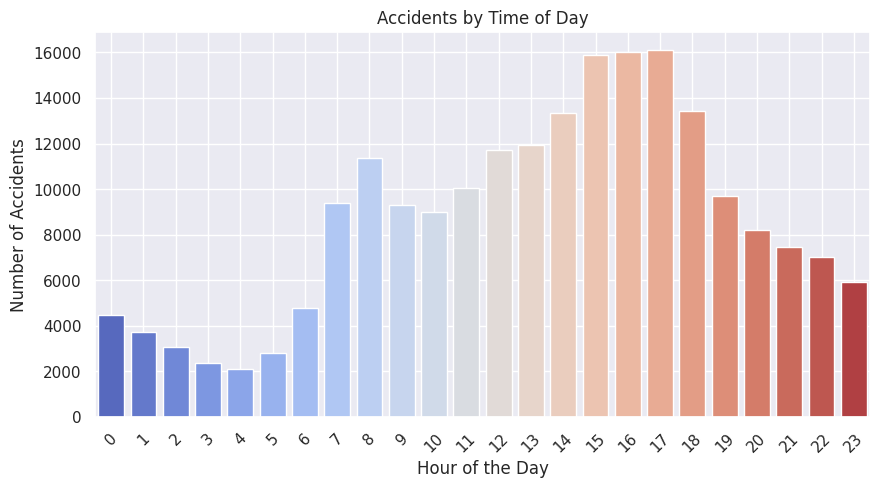

In [ ]:
#Plot: Accidents by Hour of the Day
plt.figure(figsize=(10, 5))
sns.countplot(x=df["crash_hour"], palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Time of Day")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Interpretation:**
The bar plot illustrates the distribution of accidents by the hour of the day. The x-axis represents different hours, while the y-axis shows the count of accidents occurring at each hour. Key insights include:
- **Peak Hours:** Accidents tend to occur more frequently during rush hours (e.g., morning and evening peak times).
- **Late Night Risk:** There might be an increase in accidents during late-night hours due to factors like fatigue or impaired driving.


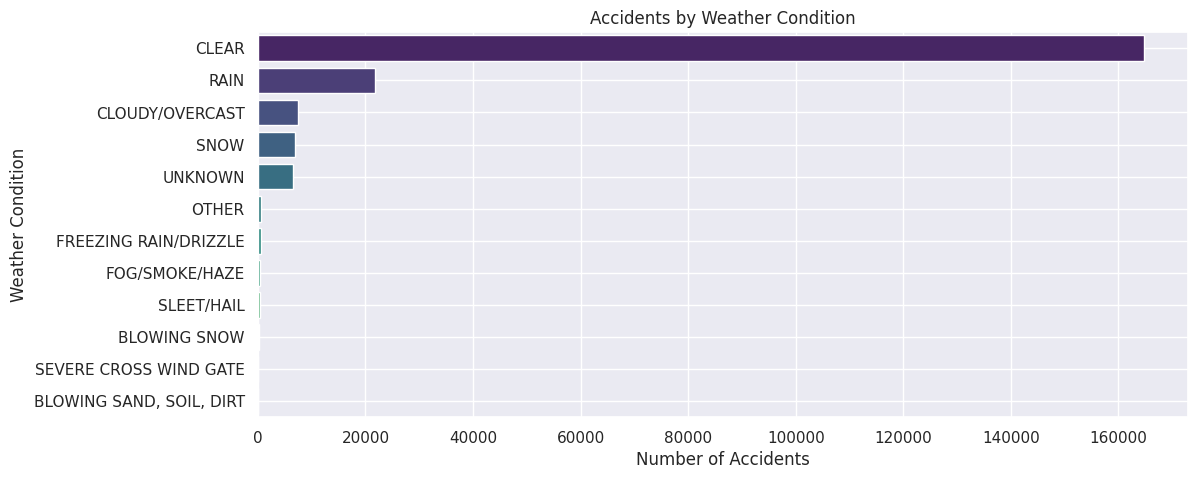

In [ ]:
# Plot: Accidents by Weather Condition
plt.figure(figsize=(12, 5))
sns.countplot(y=df["weather_condition"], order=df["weather_condition"].value_counts().index, palette="viridis")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.title("Accidents by Weather Condition")
plt.grid(True)
plt.show()

**Interpretation:**
This bar plot shows how different weather conditions affect accident occurrences. Key takeaways:
- **Clear weather dominates**: Most accidents happen during clear weather, possibly due to higher traffic volume.
- **Adverse weather conditions**: Rain, snow, and fog contribute to a significant number of accidents, emphasizing the need for cautious driving in such conditions.

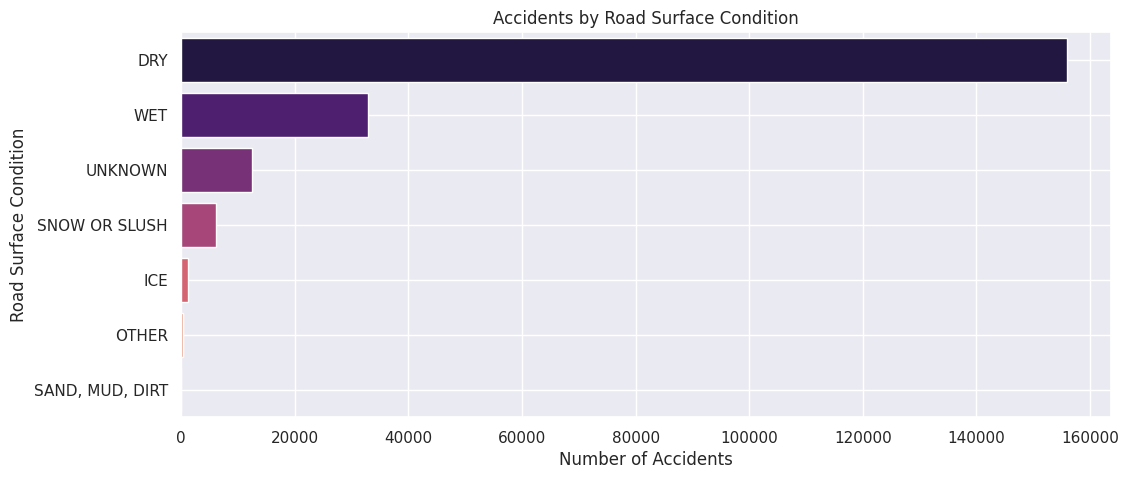

In [ ]:
# Plot: Accidents by Road Surface Condition
plt.figure(figsize=(12, 5))
sns.countplot(y=df["roadway_surface_cond"], order=df["roadway_surface_cond"].value_counts().index, palette="magma")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Surface Condition")
plt.title("Accidents by Road Surface Condition")
plt.grid(True)
plt.show()

**Interpretation:**
This visualization highlights how road surface conditions contribute to accident occurrences:
- **Dry roads account for most accidents**, reflecting normal traffic flow and congestion-related risks.
- **Wet, icy, and snowy roads** increase accident risks, indicating poor traction and visibility concerns.


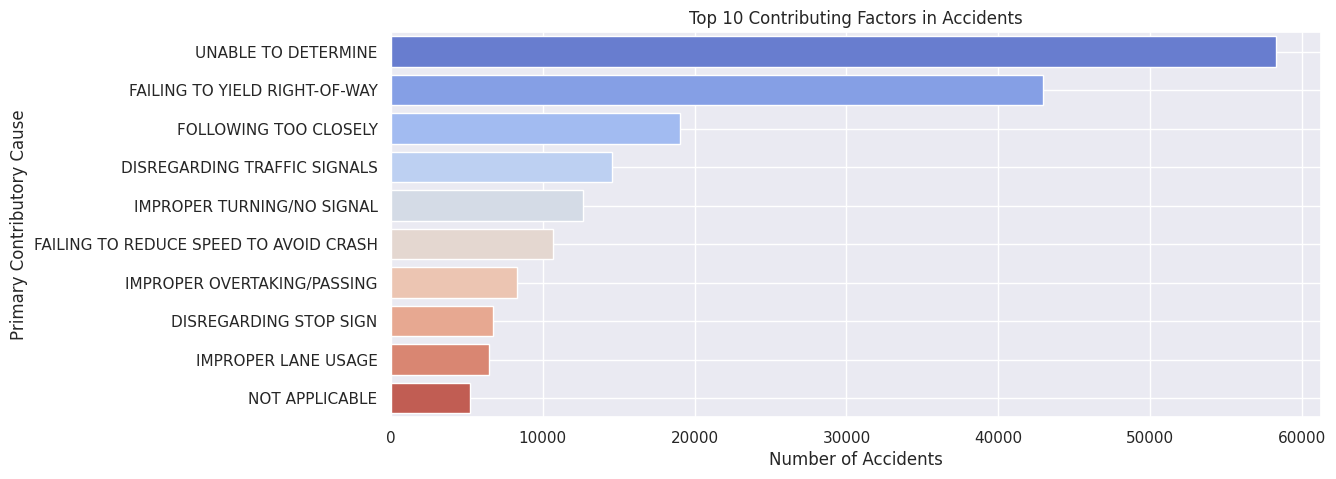

In [ ]:
#Plot: Contributing Factors
plt.figure(figsize=(12, 5))
sns.countplot(y=df["prim_contributory_cause"], order=df["prim_contributory_cause"].value_counts().index[:10], palette="coolwarm")
plt.xlabel("Number of Accidents")
plt.ylabel("Primary Contributory Cause")
plt.title("Top 10 Contributing Factors in Accidents")
plt.grid(True)
plt.show()

**Interpretation:**
This plot reveals the leading causes of accidents. Key insights:
- **Driver errors such as speeding and distracted driving dominate.**
- **Weather and road conditions also contribute but to a lesser extent.**
- **Improving awareness and enforcement in these areas can reduce accidents.**

##**Risk Assessment**

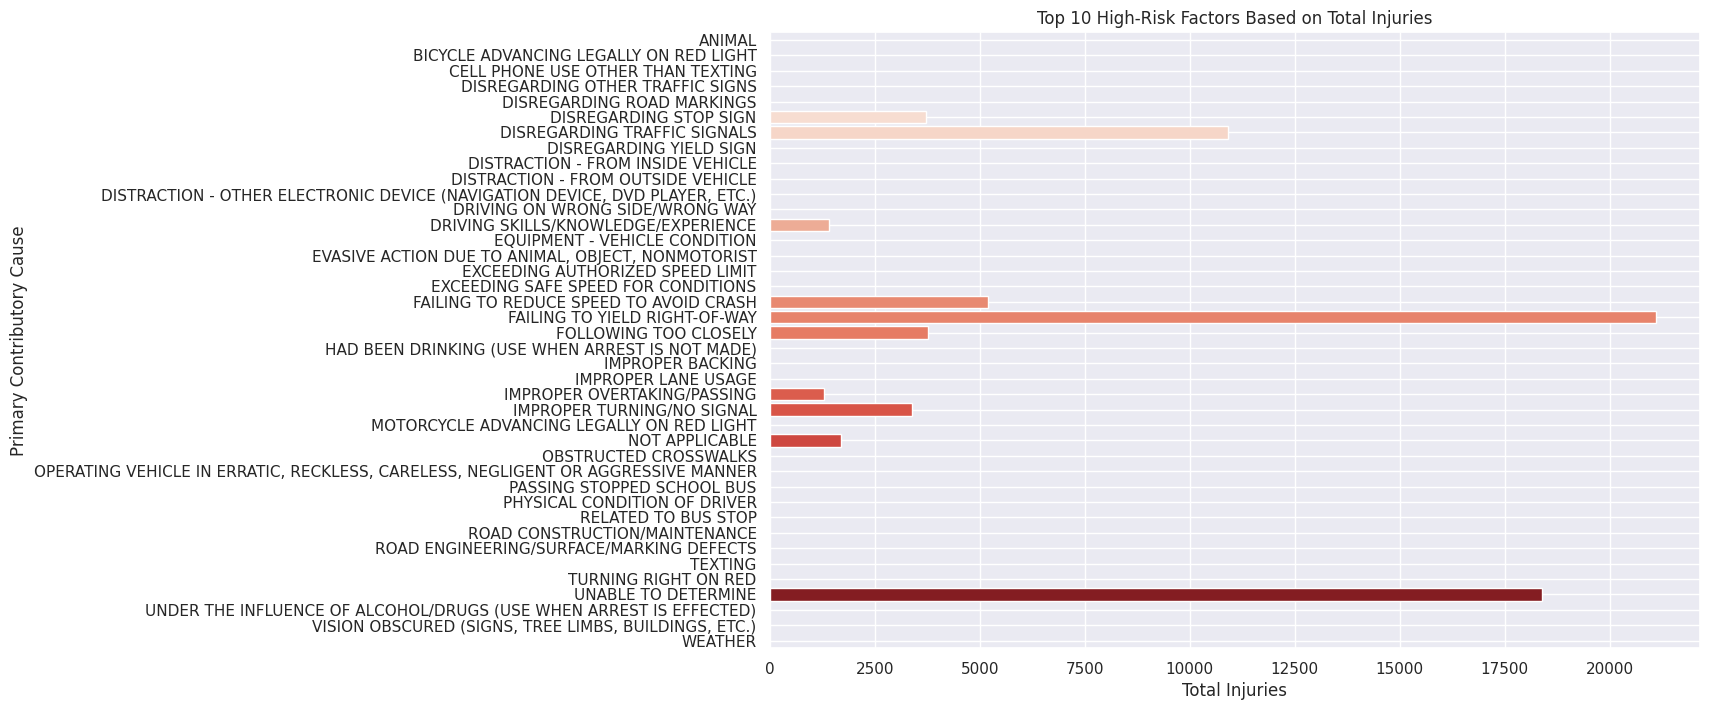

In [ ]:
# Identify high-risk locations
high_risk = df.groupby("prim_contributory_cause")["injuries_total"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=high_risk.index, x=high_risk.values, palette="Reds")
plt.xlabel("Total Injuries")
plt.ylabel("Primary Contributory Cause")
plt.title("Top 10 High-Risk Factors Based on Total Injuries")
plt.grid(True)
plt.show()

## **Conclusion**
The analysis provided insights into the patterns of traffic accidents concerning road conditions, weather, and time of day. The visualizations identified high-risk hours, adverse weather effects, and primary contributing factors. Addressing these risks through improved road safety measures, driver awareness programs, and stricter enforcement of traffic laws can help reduce accident rates and improve overall safety.
